In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

About Dataset:

This is an entity-level sentiment analysis dataset of twitter.
Given a message and an entity, the task is to judge the sentiment of the message about the entity. 
There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

In [5]:
df=pd.read_csv("twitter_training.csv",header=0)

In [7]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.columns=['Id','Entity','Sentiment','Tweet']

In [11]:
df.head()

,Id,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df.shape

(74681, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [17]:
df.duplicated().sum()

2700

In [19]:
df=df.drop_duplicates(keep='first')

In [21]:
df.isnull().sum()

Id             0
Entity         0
Sentiment      0
Tweet        326
dtype: int64

In [23]:
df=df.dropna()

In [25]:
df.shape

(71655, 4)

In [27]:
df=df.drop(columns=['Id'])

In [29]:
df['Entity'].value_counts()

Entity
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                     

In [31]:
df['Sentiment'].value_counts()

Sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

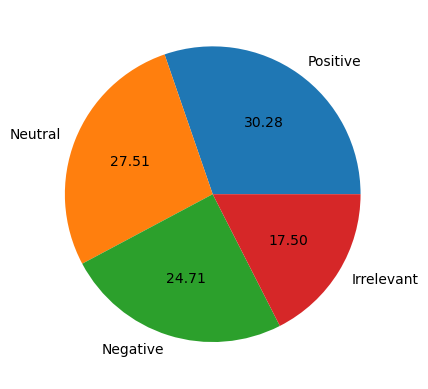

In [33]:
plt.pie(df['Sentiment'].value_counts(),autopct="%.2f",labels=df['Sentiment'].unique())
plt.show()

There is a slight imbalance in the classes.

<Axes: xlabel='Sentiment', ylabel='count'>

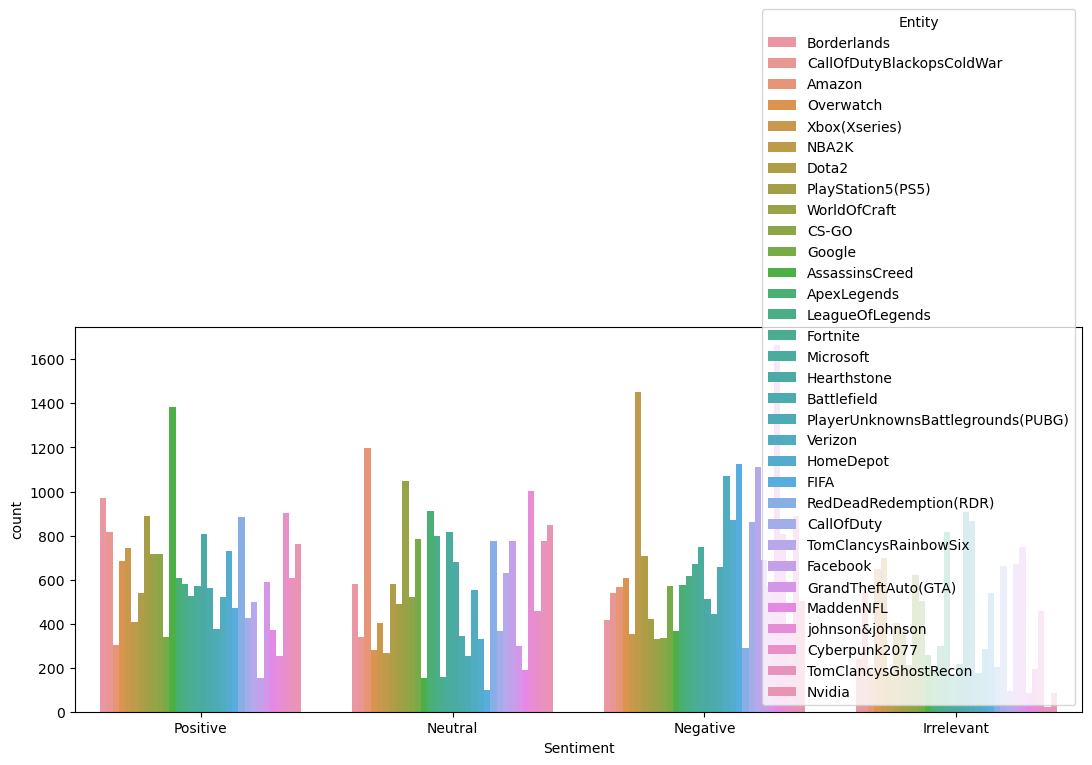

In [36]:
plt.figure(figsize = (13, 5))
sns.countplot(data=df,x="Sentiment",hue="Entity")

In [29]:
df['Tweet']=df['Entity']+" "+df['Tweet']

In [31]:
df=df.drop(columns=['Entity'])

In [33]:
df.head()

,Sentiment,Tweet
0,Positive,Borderlands I am coming to the borders and I w...
1,Positive,Borderlands im getting on borderlands and i wi...
2,Positive,Borderlands im coming on borderlands and i wil...
3,Positive,Borderlands im getting on borderlands 2 and i ...
4,Positive,Borderlands im getting into borderlands and i ...


In [200]:
df['num_char']=df['Tweet'].apply(lambda x:len(x))

In [202]:
df['num_words']=df['Tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

In [203]:
df['num_sentences']=df['Tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [204]:
df.head()

,Sentiment,Tweet,num_char,num_words,num_sentences
0,Positive,Borderlands I am coming to the borders and I w...,63,14,1
1,Positive,Borderlands im getting on borderlands and i wi...,62,12,1
2,Positive,Borderlands im coming on borderlands and i wil...,63,12,1
3,Positive,Borderlands im getting on borderlands 2 and i ...,69,14,1
4,Positive,Borderlands im getting into borderlands and i ...,65,12,1


In [205]:
df.describe()

,num_char,num_words,num_sentences
count,71655.000000,71655.000000,71655.000000
mean,123.629614,24.491927,1.956905
std,79.378490,17.168633,1.636142
min,6.000000,1.000000,1.000000
25%,62.000000,12.000000,1.000000
50%,106.000000,20.000000,1.000000
75%,168.000000,34.000000,2.000000
max,978.000000,202.000000,33.000000


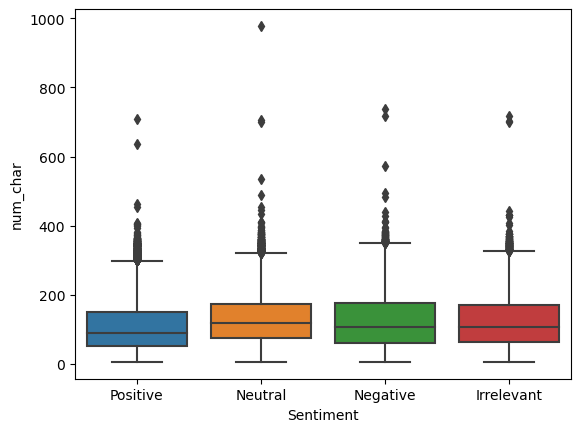

In [206]:
sns.boxplot(x="Sentiment", y="num_char", data=df )
plt.show()

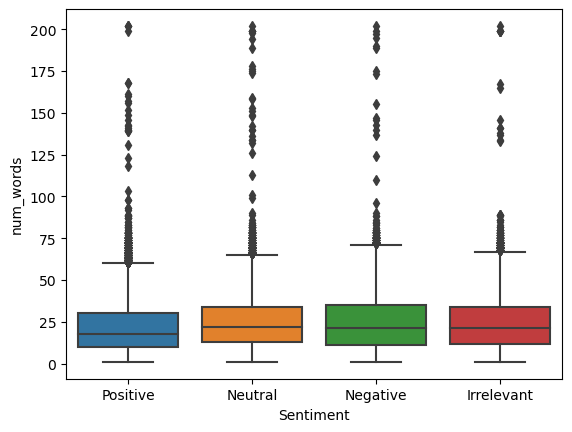

In [207]:
sns.boxplot(x="Sentiment", y="num_words", data=df )
plt.show()

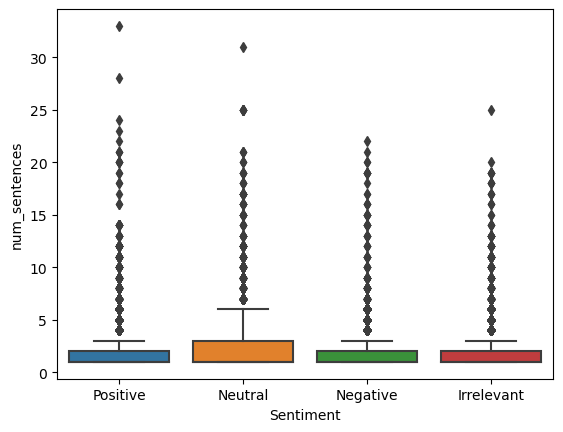

In [209]:
sns.boxplot(x="Sentiment", y="num_sentences", data=df )
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sentiment']=le.fit_transform(df['Sentiment'])

<Axes: >

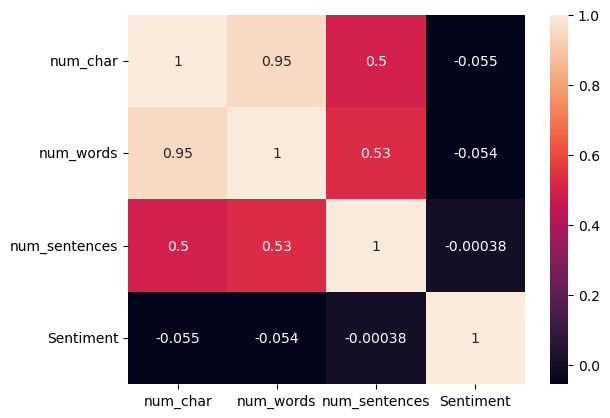

In [218]:
sns.heatmap(df[['num_char','num_words','num_sentences','Sentiment']].corr(),annot=True)

In [220]:
df=df.drop(columns=['num_char','num_words','num_sentences'])

In [37]:
df.head()

,Sentiment,Tweet
0,3,Borderlands I am coming to the borders and I w...
1,3,Borderlands im getting on borderlands and i wi...
2,3,Borderlands im coming on borderlands and i wil...
3,3,Borderlands im getting on borderlands 2 and i ...
4,3,Borderlands im getting into borderlands and i ...


# Text Preprocessing

1) Convert String to lower case
2) Keep the words which are alphanumeric and remove the special characters
3) Remove punctuation
4) Remove stopwords
5) Lemmatize the words to get the base word 

In [41]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [43]:
def preprocess(text):
    text=text.lower()
    words=nltk.word_tokenize(text)
    cleanText=[]
    for i in words:
        if  i.isalnum() and  i not in string.punctuation and i not in stopwords.words('english'):
            i=lemmatizer.lemmatize(i)
            cleanText.append(i)
    
    return " ".join(cleanText)

In [45]:
df['Tweet']=df['Tweet'].apply(preprocess)

In [46]:
df.head()

,Sentiment,Tweet
0,3,borderland coming border kill
1,3,borderland im getting borderland kill
2,3,borderland im coming borderland murder
3,3,borderland im getting borderland 2 murder
4,3,borderland im getting borderland murder


# Converting tweet to vectors

## Bag of words

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1, 3),max_features=25000)
X_train=cv.fit_transform(df['Tweet']).toarray()

In [48]:
y_train=df['Sentiment']

In [49]:
validation_df=pd.read_csv("twitter_validation.csv")

In [50]:
validation_df.columns=["Id","Entity","Sentiment","Tweet"]

In [51]:
validation_df['Tweet']=validation_df['Entity']+" "+validation_df['Tweet']
validation_df['Sentiment']=le.transform(validation_df['Sentiment'])

In [52]:
validation_df=validation_df.drop(columns=['Id','Entity'])

In [53]:
validation_df.head()

,Sentiment,Tweet
0,2,Amazon BBC News - Amazon boss Jeff Bezos rejec...
1,1,Microsoft @Microsoft Why do I pay for WORD whe...
2,1,CS-GO CSGO matchmaking is so full of closet ha...
3,2,Google Now the President is slapping Americans...
4,1,FIFA Hi @EAHelp I’ve had Madeleine McCann in m...


In [56]:
validation_df['Tweet']=validation_df['Tweet'].apply(preprocess)
X_test=cv.transform(validation_df['Tweet']).toarray()
y_test=validation_df['Sentiment']

In [74]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(max_iter=100)
LR.fit(X_train, y_train)

In [ ]:
y_pred=LR.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score

In [243]:
mnb=MultinomialNB()

In [244]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71655, 10000)
(71655,)
(999, 10000)
(999,)


In [245]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

0.7297297297297297
0.7288023069153755


In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(max_features=10000)
X_train=tf_idf.fit_transform(df['Tweet']).toarray()

In [247]:
X_test=tf_idf.transform(validation_df['Tweet']).toarray()

In [249]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

0.7647647647647647
0.7621165126551714


In [251]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)

In [253]:
tf_idf=TfidfVectorizer()
X_train=tf_idf.fit_transform(df['Tweet']).toarray()

X_test=tf_idf.transform(validation_df['Tweet']).toarray()

In [ ]:
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

# Dataset is slighly imbalanced so weighted f1 score is a good metric to use